In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
cards_df= pd.read_csv("card_transdata.csv")

In [3]:
cards_df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

In [29]:
cards_df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [45]:
Q1 = cards_df['ratio_to_median_purchase_price'].quantile(0.25)
Q3 = cards_df['ratio_to_median_purchase_price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = cards_df[(cards_df['ratio_to_median_purchase_price'] >= lower_bound) & 
                         (cards_df['ratio_to_median_purchase_price'] <= upper_bound)]

<Axes: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

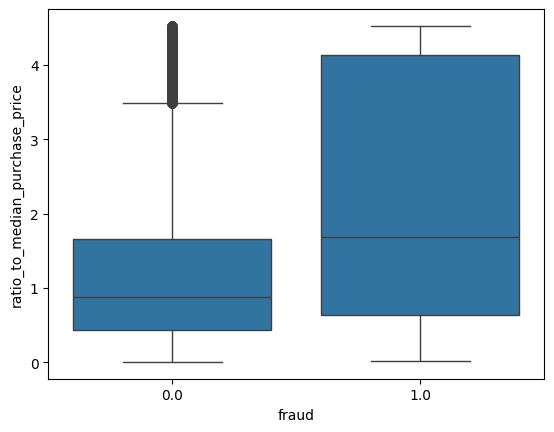

In [5]:
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=filtered_data)

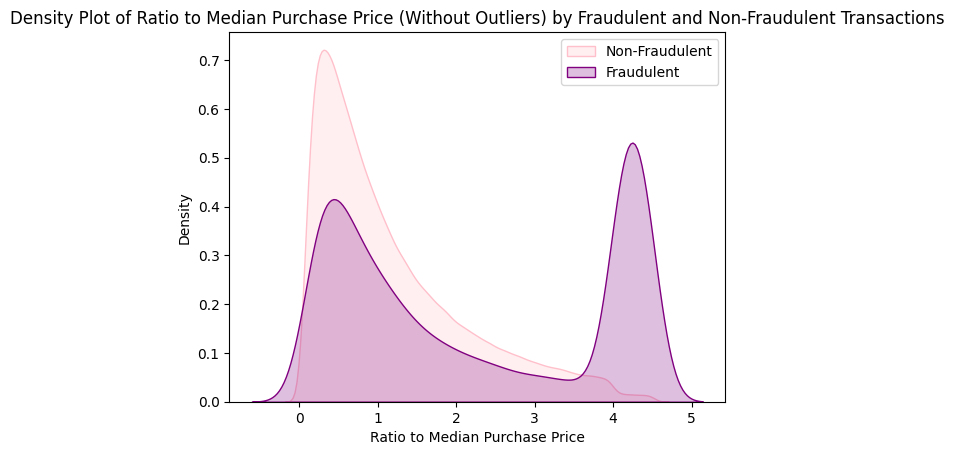

In [25]:
sns.kdeplot(data=filtered_data[filtered_data['fraud'] == 0], x='ratio_to_median_purchase_price', label='Non-Fraudulent', fill=True, color = 'pink')
sns.kdeplot(data=filtered_data[filtered_data['fraud'] == 1], x='ratio_to_median_purchase_price', label='Fraudulent', fill=True, color = 'purple')
plt.title("Density Plot of Ratio to Median Purchase Price (Without Outliers) by Fraudulent and Non-Fraudulent Transactions")
plt.xlabel("Ratio to Median Purchase Price")
plt.ylabel("Density")
plt.legend()

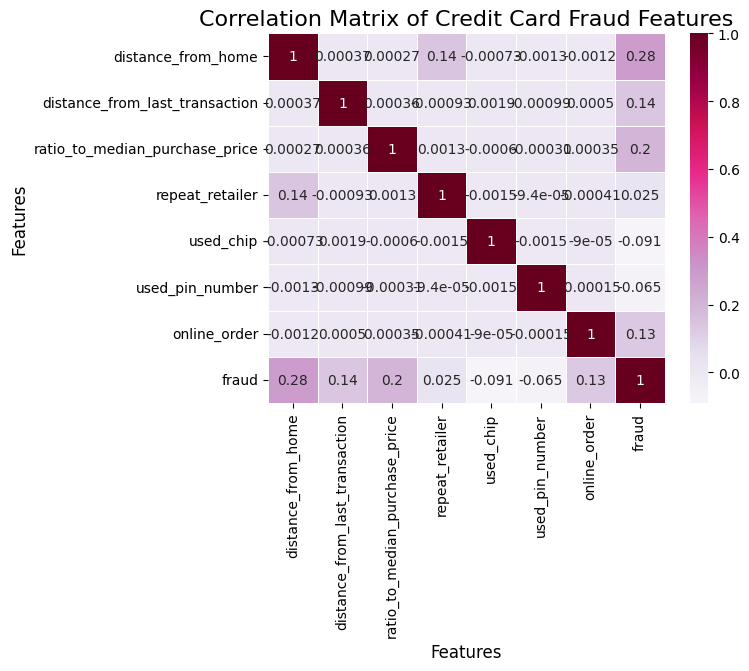

In [28]:
sns.heatmap(corr_matrix, annot=True, cmap="PuRd", linewidths=0.5)
plt.title('Correlation Matrix of Credit Card Fraud Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [30]:
X = cards_df.drop(columns = ['fraud'])
y = cards_df['fraud']

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )

In [32]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (800000, 7)
X_test (200000, 7)
y_train (800000,)
y_test (200000,)


In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [34]:
predicted = clf.predict(X_test)

In [35]:
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [36]:
clf.score(X_test, y_test)

0.999985

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (90,90), dpi=300)
tree.plot_tree(clf, max_depth = 1, feature_names = X.columns, filled=True)
plt.show()

In [38]:
X = cards_df.drop(columns = ['fraud', 'ratio_to_median_purchase_price'])
y = cards_df['fraud']

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 )

In [40]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (800000, 6)
X_test (200000, 6)
y_train (800000,)
y_test (200000,)


In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [42]:
predicted = clf.predict(X_test)

In [43]:
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
clf.score(X_test, y_test)

0.885125

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (90,90), dpi=300)
tree.plot_tree(clf, max_depth = 1, feature_names = X.columns, filled=True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11828\3749398384.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', color = 'pink')


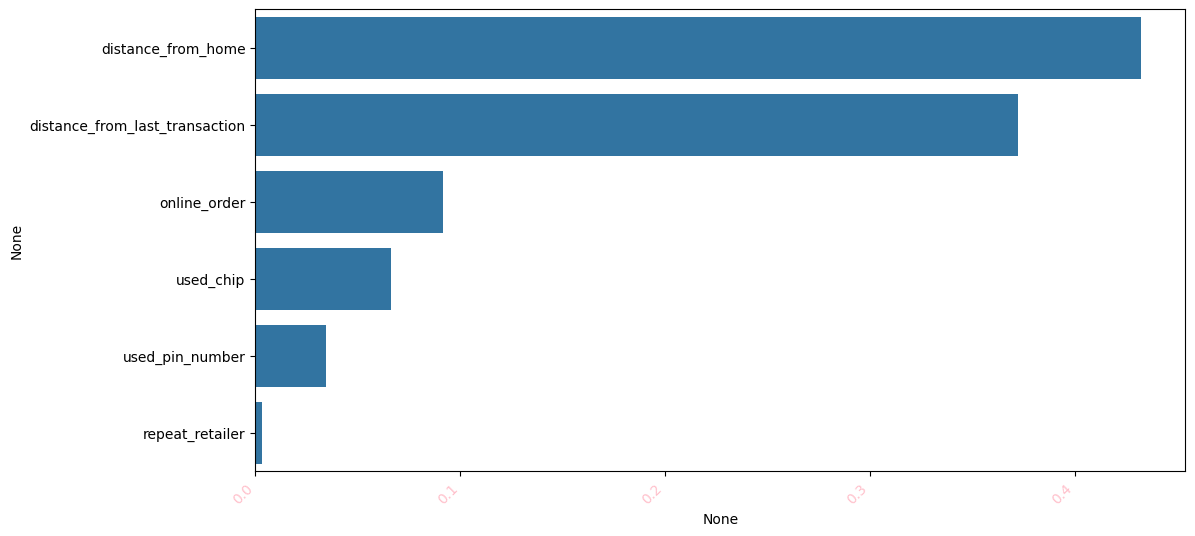

In [47]:
fi = clf.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', color = 'pink')
plt.show()

In [48]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    182525
         1.0       0.35      0.36      0.35     17475

    accuracy                           0.89    200000
   macro avg       0.64      0.65      0.65    200000
weighted avg       0.89      0.89      0.89    200000

